In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Dương Bảo Châu'

/content/drive/.shortcut-targets-by-id/1xBP49vgC0ID9xnGysLw1YvZa0h6-OSVX/Dương Bảo Châu


In [3]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option

In [5]:
dataset = pd.read_csv('dataset.csv')

In [6]:
dataset.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [8]:
dataset.shape

(20, 3)

In [12]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:2]
Y = array[:,2]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
X_train.shape, X_validation.shape

((16, 2), (4, 2))

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [17]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression().fit(rescaledX, Y_train)

In [21]:
model.predict_proba(scaler.transform(X_validation))

array([[0.16717725, 0.83282275],
       [0.82900075, 0.17099925],
       [0.76319099, 0.23680901],
       [0.23189768, 0.76810232]])

In [30]:
model.predict_proba(scaler.transform(np.array([6, 0.5]).reshape(-1, 2)))

array([[0.76808325, 0.23191675]])

In [31]:
model.predict_proba(scaler.transform(np.array([7, 1.5]).reshape(-1, 2)))

array([[0.23678966, 0.76321034]])

In [89]:
x_plot = np.array(range(-1000, 1000)).reshape(-1, 2)
y_plot = model.predict(scaler.transform(x_plot))

In [36]:
import matplotlib.pyplot as plt


In [39]:
import seaborn as sns

In [82]:
x_plot[:,:1].shape

(500, 1)

In [69]:
y_plot.shape

(500,)

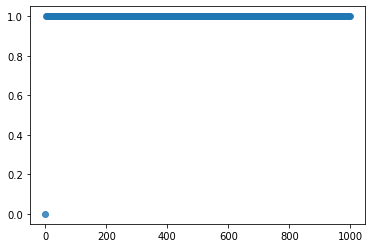

In [83]:
sns.regplot(x=x_plot[:,:1], y=y_plot, data=dataset, logistic=True, ci=None)

In [95]:
from scipy.special import expit

ValueError: ignored

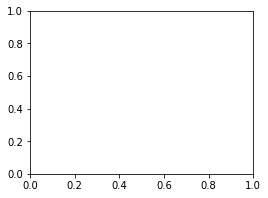

In [97]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X_train.ravel(), Y_train, color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

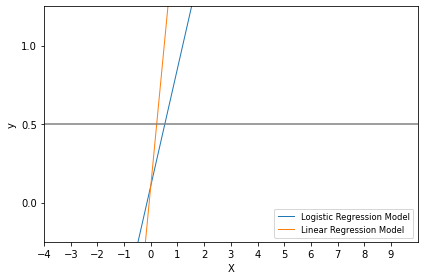